In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('realtor-data-sc.csv')

In [3]:
X = data.drop(columns=['price'])
y = data['price']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
degree_range = [1, 2, 3, 4, 5] 
param_grid = {'degree': degree_range}

In [6]:
poly_features = PolynomialFeatures()
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [7]:
grid_search = GridSearchCV(LinearRegression(), {}, cv=5)
grid_search.fit(X_train_poly, y_train)

,estimator,LinearRegression()
,param_grid,{}
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,fit_intercept,True


In [8]:
best_model = grid_search.best_estimator_

In [9]:
y_pred = best_model.predict(X_test_poly)

In [10]:
r2_test = r2_score(y_test, y_pred)
r2_test

0.5399603847177223

In [11]:
mse = mean_squared_error(y_test, y_pred)
mse

0.4515871612239606

In [12]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.3217918676005423

In [13]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

np.float64(0.6720023520970448)

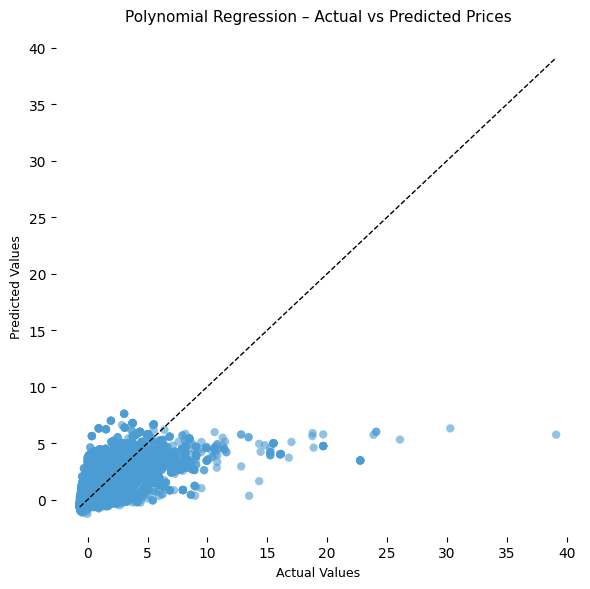

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6), facecolor="white")
plt.scatter(y_test, y_pred, alpha=0.6, color="#4B9CD3", edgecolors='none')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linewidth=1, linestyle='--')
plt.title("Polynomial Regression – Actual vs Predicted Prices", fontsize=11, pad=10)
plt.xlabel("Actual Values", fontsize=9)
plt.ylabel("Predicted Values", fontsize=9)
plt.box(False)
plt.tight_layout()
plt.savefig("Polynomial_Regression_LinkedIn.png", dpi=300, bbox_inches='tight')
plt.show()


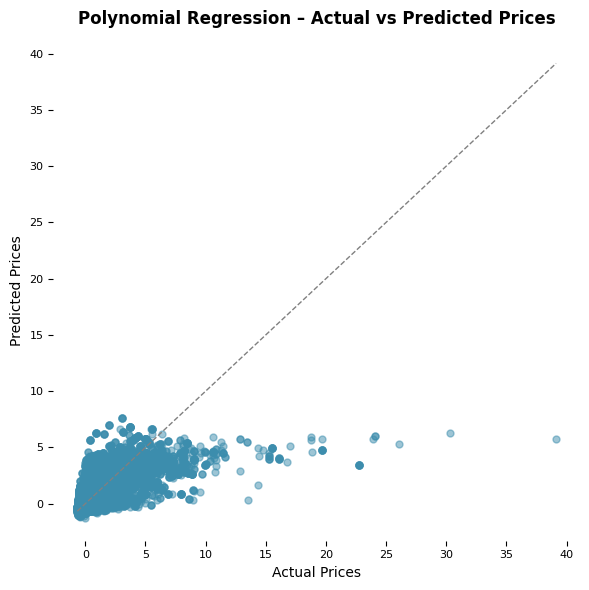

In [15]:
plt.figure(figsize=(6,6), facecolor="white")
plt.scatter(y_test, y_pred, alpha=0.5, color="#3C8DAD", s=25)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='gray', linewidth=1, linestyle='--')
plt.title("Polynomial Regression – Actual vs Predicted Prices", fontsize=12, pad=12, weight='bold')
plt.xlabel("Actual Prices", fontsize=10)
plt.ylabel("Predicted Prices", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.box(False)
plt.tight_layout()
plt.savefig("Polynomial_Regression_LinkedIn_Clean.png", dpi=300, bbox_inches='tight', facecolor="white")
plt.show()
